# 3.5 Factor Analysis on Financial and Economic Time Series

Factor Analysis and Principal Component Analysis on Financial and Economic Time Series

In [ ]:
# If you're running this on Colab, make sure to install the following packages using pip.
# On you're own computer, I recommend using conda or mamba.

# !pip install pandas-datareader
# !pip install yfinance

# !conda install pandas-datareader
# !conda install yfinance

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import yfinance as yf
import pandas_datareader as pdr
import sklearn.decomposition
import statsmodels.multivariate.pca

In [3]:
import config
DATA_DIR = config.DATA_DIR

## Downloading macroeconomic and financial data from FRED

In [4]:
fred_series_long_names = {
    'BAMLH0A0HYM2': 'ICE BofA US High Yield Index Option-Adjusted Spread',
    'NASDAQCOM': 'NASDAQ Composite Index',
    'RIFSPPFAAD90NB': '90-Day AA Financial Commercial Paper Interest Rate',
    'TB3MS': '3-Month Treasury Bill Secondary Market Rate',
    'DGS10': 'Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity',
    'VIXCLS': 'CBOE Volatility Index: VIX',
}

In [5]:
fred_series_short_names = {
    'BAMLH0A0HYM2': 'High Yield Index OAS',
    'NASDAQCOM': 'NASDAQ',
    'RIFSPPFAAD90NB': '90-Day AA Fin CP',
    'TB3MS': '3-Month T-Bill',
    'DGS10': '10-Year Treasury',
    'VIXCLS': 'VIX',
}

In [6]:
start_date = pd.to_datetime('1980-01-01') 
end_date = pd.to_datetime('today') 

In [7]:
df = pdr.get_data_fred(fred_series_short_names.keys(), start=start_date, end=end_date)

In [9]:
fred_series_short_names.keys()

dict_keys(['BAMLH0A0HYM2', 'NASDAQCOM', 'RIFSPPFAAD90NB', 'TB3MS', 'DGS10', 'VIXCLS'])

In [8]:
df

,BAMLH0A0HYM2,NASDAQCOM,RIFSPPFAAD90NB,TB3MS,DGS10,VIXCLS
DATE,,,,,,
1980-01-01,NaN,NaN,NaN,12.0,NaN,NaN
1980-01-02,NaN,148.17,NaN,NaN,10.50,NaN
1980-01-03,NaN,145.97,NaN,NaN,10.60,NaN
1980-01-04,NaN,148.02,NaN,NaN,10.66,NaN
1980-01-07,NaN,148.62,NaN,NaN,10.63,NaN
...,...,...,...,...,...,...
2024-08-02,3.72,16776.16,NaN,NaN,3.80,23.39
2024-08-05,3.93,16200.08,NaN,NaN,3.78,38.57
2024-08-06,NaN,16366.85,NaN,NaN,3.90,27.71


First, an aside about reading and writing data to disk.

In [10]:
DATA_DIR

PosixPath('/Users/wenlan/Documents/GitHub/finm-python-crash-course/data')

In [11]:
df.to_csv(DATA_DIR / 'fred_panel.csv')

In [12]:
dff = pd.read_csv(DATA_DIR / 'fred_panel.csv')

In [13]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11882 entries, 0 to 11881
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            11882 non-null  object 
 1   BAMLH0A0HYM2    7206 non-null   float64
 2   NASDAQCOM       11246 non-null  float64
 3   RIFSPPFAAD90NB  6468 non-null   float64
 4   TB3MS           535 non-null    float64
 5   DGS10           11153 non-null  float64
 6   VIXCLS          8732 non-null   float64
dtypes: float64(6), object(1)
memory usage: 649.9+ KB


In [14]:
dff = pd.read_csv(DATA_DIR / 'fred_panel.csv', parse_dates=['DATE'])

In [15]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11882 entries, 0 to 11881
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            11882 non-null  datetime64[ns]
 1   BAMLH0A0HYM2    7206 non-null   float64       
 2   NASDAQCOM       11246 non-null  float64       
 3   RIFSPPFAAD90NB  6468 non-null   float64       
 4   TB3MS           535 non-null    float64       
 5   DGS10           11153 non-null  float64       
 6   VIXCLS          8732 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 649.9 KB


In [16]:
dff = dff.set_index('DATE')

In [17]:
df.to_parquet(DATA_DIR / 'fred_panel.parquet')

In [18]:
df = pd.read_parquet(DATA_DIR / 'fred_panel.parquet')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11882 entries, 1980-01-01 to 2024-08-08
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BAMLH0A0HYM2    7206 non-null   float64
 1   NASDAQCOM       11246 non-null  float64
 2   RIFSPPFAAD90NB  6468 non-null   float64
 3   TB3MS           535 non-null    float64
 4   DGS10           11153 non-null  float64
 5   VIXCLS          8732 non-null   float64
dtypes: float64(6)
memory usage: 649.8 KB


In [20]:
df

,BAMLH0A0HYM2,NASDAQCOM,RIFSPPFAAD90NB,TB3MS,DGS10,VIXCLS
DATE,,,,,,
1980-01-01,NaN,NaN,NaN,12.0,NaN,NaN
1980-01-02,NaN,148.17,NaN,NaN,10.50,NaN
1980-01-03,NaN,145.97,NaN,NaN,10.60,NaN
1980-01-04,NaN,148.02,NaN,NaN,10.66,NaN
1980-01-07,NaN,148.62,NaN,NaN,10.63,NaN
...,...,...,...,...,...,...
2024-08-02,3.72,16776.16,NaN,NaN,3.80,23.39
2024-08-05,3.93,16200.08,NaN,NaN,3.78,38.57
2024-08-06,NaN,16366.85,NaN,NaN,3.90,27.71


## Cleaning Data


In [21]:
df = dff.rename(columns=fred_series_short_names)
df

,High Yield Index OAS,NASDAQ,90-Day AA Fin CP,3-Month T-Bill,10-Year Treasury,VIX
DATE,,,,,,
1980-01-01,NaN,NaN,NaN,12.0,NaN,NaN
1980-01-02,NaN,148.17,NaN,NaN,10.50,NaN
1980-01-03,NaN,145.97,NaN,NaN,10.60,NaN
1980-01-04,NaN,148.02,NaN,NaN,10.66,NaN
1980-01-07,NaN,148.62,NaN,NaN,10.63,NaN
...,...,...,...,...,...,...
2024-08-02,3.72,16776.16,NaN,NaN,3.80,23.39
2024-08-05,3.93,16200.08,NaN,NaN,3.78,38.57
2024-08-06,NaN,16366.85,NaN,NaN,3.90,27.71


Balanced panel? Mixed frequencies?

In [22]:
df['3-Month T-Bill'].dropna()

DATE
1980-01-01    12.00
1980-02-01    12.86
1980-03-01    15.20
1980-04-01    13.20
1980-05-01     8.58
              ...  
2024-03-01     5.24
2024-04-01     5.24
2024-05-01     5.25
2024-06-01     5.24
2024-07-01     5.20
Name: 3-Month T-Bill, Length: 535, dtype: float64

Find a daily version of this series. See here: https://fred.stlouisfed.org/categories/22

We will end up using this series: https://fred.stlouisfed.org/series/DTB3

In [23]:
fred_series_short_names = {
    'BAMLH0A0HYM2': 'High Yield Index OAS',
    'NASDAQCOM': 'NASDAQ',
    'RIFSPPFAAD90NB': '90-Day AA Fin CP',
    'DTB3': '3-Month T-Bill',
    'DGS10': '10-Year Treasury',
    'VIXCLS': 'VIX',
}
df = pdr.get_data_fred(fred_series_short_names.keys(), start=start_date, end=end_date)
df = df.rename(columns=fred_series_short_names)

In [24]:
df

,High Yield Index OAS,NASDAQ,90-Day AA Fin CP,3-Month T-Bill,10-Year Treasury,VIX
DATE,,,,,,
1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-02,NaN,148.17,NaN,12.17,10.50,NaN
1980-01-03,NaN,145.97,NaN,12.10,10.60,NaN
1980-01-04,NaN,148.02,NaN,12.10,10.66,NaN
1980-01-07,NaN,148.62,NaN,11.86,10.63,NaN
...,...,...,...,...,...,...
2024-08-02,3.72,16776.16,NaN,5.05,3.80,23.39
2024-08-05,3.93,16200.08,NaN,5.09,3.78,38.57
2024-08-06,NaN,16366.85,NaN,5.09,3.90,27.71


In [25]:
df.dropna()

,High Yield Index OAS,NASDAQ,90-Day AA Fin CP,3-Month T-Bill,10-Year Treasury,VIX
DATE,,,,,,
1997-01-02,3.06,1280.70,5.35,5.05,6.54,21.14
1997-01-03,3.09,1310.68,5.35,5.04,6.52,19.13
1997-01-06,3.10,1316.40,5.34,5.05,6.54,19.89
1997-01-07,3.10,1327.73,5.33,5.02,6.57,19.35
1997-01-08,3.07,1320.35,5.31,5.02,6.60,20.24
...,...,...,...,...,...,...
2024-07-22,3.05,18007.57,5.29,5.19,4.26,14.91
2024-07-25,3.08,17181.72,5.32,5.17,4.27,18.46
2024-07-31,3.25,17599.40,5.30,5.15,4.09,16.36


## Transforming and Normalizing the data

What is transformation and normalization? Are these different things?

 - Why would one transform data? What is feature engineering?
 - What is normalization?

What does stationarity mean? See the the following plots. Some of these variable are stationary. Other are not? Why is this a problem?

<Axes: xlabel='DATE'>

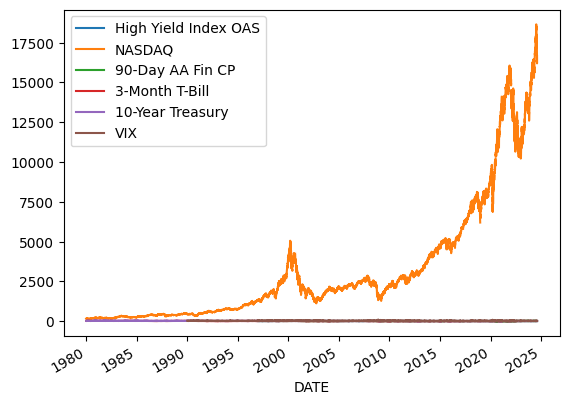

In [26]:
df.plot()

In [ ]:
df.info()

<Axes: xlabel='DATE'>

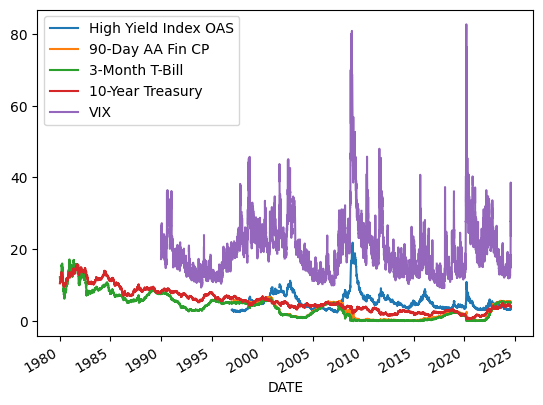

In [27]:
df.drop(columns=['NASDAQ']).plot()

Let's try some transformations like those used in the OFR Financial Stress Index: https://www.financialresearch.gov/financial-stress-index/files/indicators/index.html

In [28]:
dfn = pd.DataFrame().reindex_like(df) #index like df but the content is nan
dfn

,High Yield Index OAS,NASDAQ,90-Day AA Fin CP,3-Month T-Bill,10-Year Treasury,VIX
DATE,,,,,,
1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-08-02,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-05,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-06,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df['NASDAQ'].rolling(250).mean()

DATE
1980-01-01   NaN
1980-01-02   NaN
1980-01-03   NaN
1980-01-04   NaN
1980-01-07   NaN
              ..
2024-08-02   NaN
2024-08-05   NaN
2024-08-06   NaN
2024-08-07   NaN
2024-08-08   NaN
Name: NASDAQ, Length: 11731, dtype: float64

In [30]:
df = df.dropna()

In [31]:
df['NASDAQ'].rolling(250).mean()

DATE
1997-01-02            NaN
1997-01-03            NaN
1997-01-06            NaN
1997-01-07            NaN
1997-01-08            NaN
                 ...     
2024-07-22    13564.74956
2024-07-25    13590.21472
2024-07-31    13615.90668
2024-08-01    13640.08872
2024-08-08    13662.43556
Name: NASDAQ, Length: 6449, dtype: float64

In [32]:
# 'High Yield Index OAS': Leave as is
# !!! stationeries process
# !!!对nasdaq进行np.log是因为如果不log的话数据波动很大
# for PCA, colinear没关系的！！
dfn['High Yield Index OAS'] = df['High Yield Index OAS']
dfn['CP - Treasury Spread, 3m'] = df['90-Day AA Fin CP'] - df['3-Month T-Bill']
# 'NASDAQ':  # We're using something different, but still apply rolling mean transformation
dfn['NASDAQ'] = np.log(df['NASDAQ']) - np.log(df['NASDAQ'].rolling(250).mean())
dfn['10-Year Treasury'] = df['10-Year Treasury'] - df['10-Year Treasury'].rolling(250).mean()
# 'VIX': Leave as is
dfn['VIX'] = df['VIX']

In [33]:
dfn = dfn.drop(columns=['90-Day AA Fin CP', '3-Month T-Bill'])
dfn = dfn.dropna()

In [34]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6200 entries, 1998-01-05 to 2024-08-08
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   High Yield Index OAS      6200 non-null   float64
 1   NASDAQ                    6200 non-null   float64
 2   10-Year Treasury          6200 non-null   float64
 3   VIX                       6200 non-null   float64
 4   CP - Treasury Spread, 3m  6200 non-null   float64
dtypes: float64(5)
memory usage: 290.6 KB


We finished with our transformations. Now, let's normalize. First, why is it important?

<Axes: xlabel='DATE'>

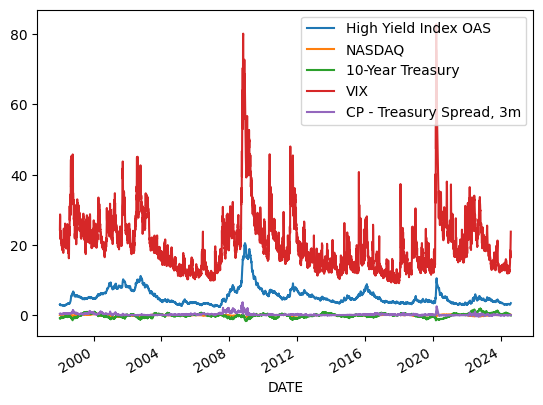

In [35]:
dfn.plot()

Now, normalize each column,
$$
z = \frac{x - \bar x}{\text{std}(x)}
$$

In [36]:
dfn = (dfn - dfn.mean()) / dfn.std()

<Axes: xlabel='DATE'>

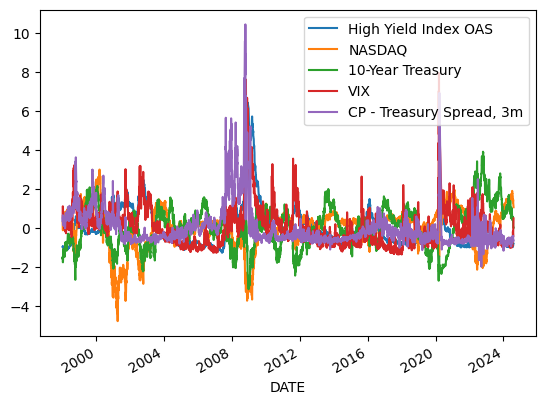

In [37]:
dfn.plot()

In [ ]:
def pca(dfn, module='scikitlearn'):
    if module == 'statsmodels':
        _pc1, _loadings, projection, rsquare, _, _, _ = statsmodels.multivariate.pca.pca(dfn,
            ncomp=1, standardize=True, demean=True, normalize=True, gls=False,
            weights=None, method='svd')
        _loadings = _loadings['comp_0']
        loadings = np.std(_pc1) * _loadings
        pc1 = _pc1 / np.std(_pc1)
        pc1 = pc1.rename(columns={'comp_0':'PC1'})['PC1']

    elif module == 'scikitlearn':
        pca = sklearn.decomposition.PCA(n_components=1)
        _pc1 = pd.Series(pca.fit_transform(dfn)[:,0], index=dfn.index, name='PC1')
        _loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
        _loadings = pd.Series(_loadings[:,0], index=dfn.columns)

        loadings = np.std(_pc1) * _loadings
        pc1 = _pc1 / np.std(_pc1)
        pc1.name = 'PC1'
    else:
        raise ValueError



    loadings.name = "loadings"

    return pc1, loadings

def stacked_plot(df, filename=None):
    """
    df=category_contributions
    # category_contributions.sum(axis=1).plot()
    """

    df_pos = df[df >= 0]
    df_neg = df[df < 0]

    alpha = .3
    linewidth = .5

    ax = df_pos.plot.area(alpha=alpha, linewidth=linewidth, legend=False)
    pc1 = df.sum(axis=1)
    pc1.name = 'pc1'
    pc1.plot(color="Black", label='pc1', linewidth=1)


    plt.legend()
    ax.set_prop_cycle(None)
    df_neg.plot.area(alpha=alpha, ax=ax, linewidth=linewidth, legend=False, ylim=(-3,3))
    # recompute the ax.dataLim
    ax.relim()
    # update ax.viewLim using the new dataLim
    ax.autoscale()
    # ax.set_ylabel('Standard Deviations')
    # ax.set_ylim(-3,4)
    # ax.set_ylim(-30,30)

    if not (filename is None):
        filename = Path(filename)
        figure = plt.gcf() # get current figure
        figure.set_size_inches(8, 6)
        plt.savefig(filename, dpi=300)


In [ ]:
pc1, loadings = pca(dfn, module='scikitlearn')

In [ ]:
pc1.plot()

In [ ]:
stacked_plot(dfn)

Let's compare solutions from two different packages

In [ ]:
def root_mean_squared_error(sa, sb):
    return np.sqrt(np.mean((sa - sb)**2))

pc1_sk, loadings_sk = pca(dfn, module='scikitlearn')
pc1_sm, loadings_sm = pca(dfn, module='statsmodels')
root_mean_squared_error(pc1_sm, pc1_sk)

## Factor Analysis of a Panel of Stock Returns?

In [ ]:
sample = yf.download("SPY AAPL MSFT", start="2017-01-01", end="2017-04-30")

In [ ]:
sample

In [ ]:
sample['Adj Close']

In [ ]:
tickers = [
    'AAPL','ABBV','ABT','ACN','ADP','ADSK','AES','AET','AFL','AMAT','AMGN','AMZN','APA',
    'APHA','APD','APTV','ARE','ASML','ATVI','AXP','BA','BAC','BAX','BDX','BIIB','BK',
    'BKNG','BMY','BRKB','BRK.A','COG','COST','CPB','CRM','CSCO','CVS','DAL','DD','DHR',
    'DIS','DOW','DUK','EMR','EPD','EQT','ESRT','EXPD','FFIV','FLS','FLT','FRT','GE',
    'GILD','GOOGL','GOOG','GS','HAL','HD','HON','IBM','INTC','IP','JNJ','JPM','KEY',
    'KHC','KIM','KO','LLY','LMT','LOW','MCD','MCHP','MDT','MMM','MO','MRK','MSFT',
    'MTD','NEE','NFLX','NKE','NOV','ORCL','OXY','PEP','PFE','PG','RTN','RTX','SBUX',
    'SHW','SLB','SO','SPG','STT','T','TGT','TXN','UNH','UPS','USB','UTX','V','VZ',
    'WMT','XOM',
]

In [ ]:
" ".join(tickers)

In [ ]:
data = yf.download(" ".join(tickers), start="1980-01-01", end="2024-08-01", progress=False)

In [ ]:
data['Adj Close']['AAPL'].plot()

In [ ]:
cols_with_many_nas = [
    "BRK.A",
    "APHA",
    "UTX",
    "RTN",
    "COG",
    "BRKB",
    "ATVI",
    "FLT",
    "DOW",
    "KHC",
    "V",
    "APTV",
    "ABBV",
    "ESRT",
]
df = data['Adj Close']
df = df.drop(columns=cols_with_many_nas).dropna().pct_change().dropna()


In [ ]:
df.columns

In [ ]:
df['AAPL'].plot()

In [ ]:
pc1, loadings = pca(df, module='scikitlearn')

In [ ]:
pc1.plot()

In [ ]:
pc1.cumsum().plot()